### Portfolio Project: Species Endangerment Across National Parks
In this project, we will analyze and interpret data from the National Parks Service to uncover insights and trends about species endangerment and propose a solution to any problems identified 

#### Project Scope:
Through careful data analysis and pattern identification, we aim to understand the key factors that affect the population of species, which species (or animal categories) are more affected, and what possible solutions/recommendations can we implement to better the situation in national parks. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import string

In [3]:
# Loading the data sets:
spinfo = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

In [5]:
# Reviewing the first 10 rows of the species dataset:
print(spinfo.head(10))
print(spinfo.info())
print(spinfo.describe())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer  

In [7]:
# Reviewing 'conservation_status' variable values:
spinfo['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [9]:
# Reviewing the first 10 rows of the observations dataset:
print(observations.head(10))
print(observations.info())
print(observations.describe())

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [11]:
# Checking for missing values:
print(spinfo.isna().sum())
print(observations.isna().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
scientific_name    0
park_name          0
observations       0
dtype: int64


In [13]:
# Replacing NaN (lack of status) of the "conservation_status" variable with a meaningful label, such as "No Interventions":
spinfo['conservation_status'].fillna('No Intervention', inplace=True)

print("== Convertion Status Counts ==")
status_counts = spinfo['conservation_status'].value_counts()
display(status_counts)

== Convertion Status Counts ==


C:\Users\user\AppData\Local\Temp\ipykernel_67324\1515793273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spinfo['conservation_status'].fillna('No Intervention', inplace=True)


conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

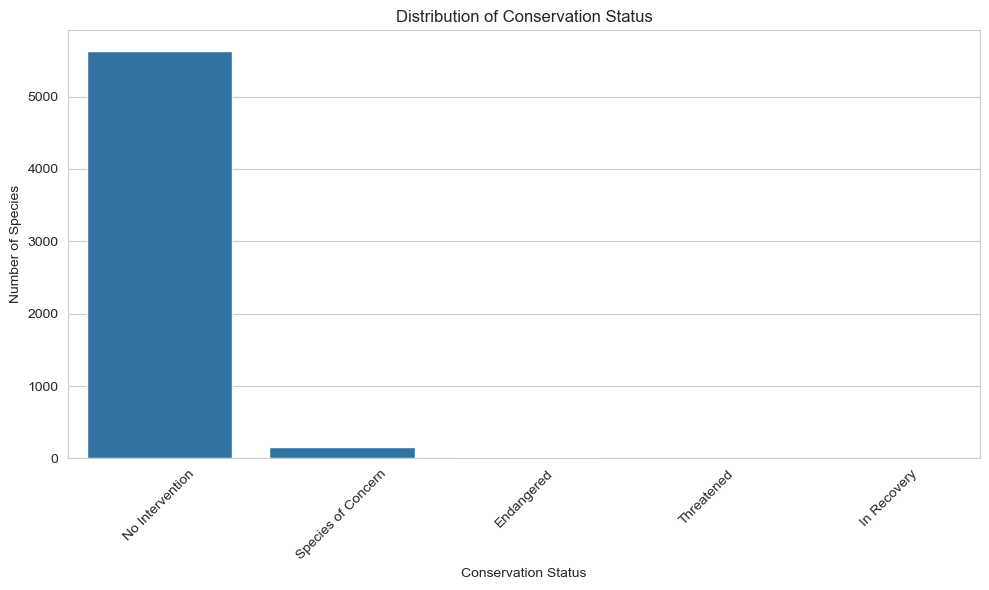

<Figure size 640x480 with 0 Axes>

In [15]:
# Distribution of Conservation Status Values:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(data=spinfo, x='conservation_status', order=status_counts.index)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

A very large proportion of species have "No Intervation" status, with far fewer classified as "Species of Concern", "Endangered", "Threatened", or "In Recovery".

Most species in the dataset are not under any special conservation status. However, there is still a noticeable subset designated as "at-risk", which may required targeted conservation efforts.

##### Are Certain Categories More Likely To Be Endangered?

In [19]:
# Creating a pivot table of category vs. conservation rate:
category_status = pd.pivot_table(
    spinfo,
    values='scientific_name',
    index='category',
    columns='conservation_status',
    aggfunc='count',
    fill_value=0
)

# Sorting categories by total number of species:
category_status['Total Species'] = category_status.sum(axis=1)
category_status = category_status.sort_values('Total Species', ascending=False)
display(category_status)

conservation_status,Endangered,In Recovery,No Intervention,Species of Concern,Threatened,Total Species
category,,,,,,
Vascular Plant,1,0,4424,43,2,4470
Bird,4,3,442,72,0,521
Nonvascular Plant,0,0,328,5,0,333
Mammal,7,1,176,28,2,214
Fish,3,0,116,4,4,127
Amphibian,1,0,73,4,2,80
Reptile,0,0,74,5,0,79


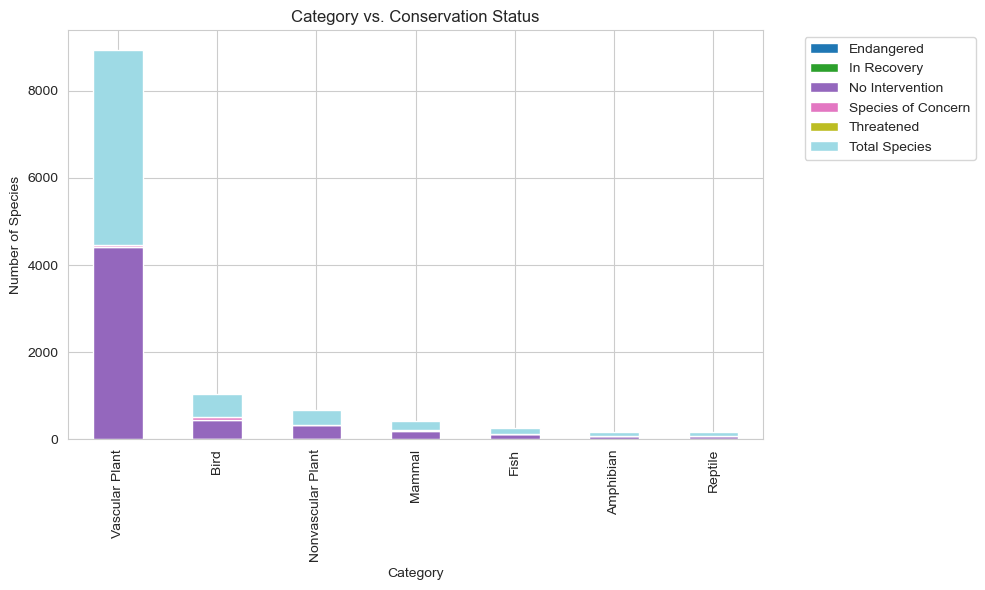

<Figure size 640x480 with 0 Axes>

In [21]:
# Creating a stacked bar chart to easily compare:
category_status.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)
plt.title('Category vs. Conservation Status')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

From the analysis, we identify that <span style="color:red">*"Vascular Plants"*</span> dominate the dataset in terms of sheer numbers, with fewer species across "Birds", "Nonvascular Plants", "Mammals", "Fish", "Amphibians", and "Reptiles". While the majority of each category has "No Intervention" status, we do see some Endangered and Threatened species in the animal categories. 

This suggests that while risk levels vary by taxonomy group, there is some degree of conservation need across most categories.

##### Conservation Catergory Analysis (With out "No Intervention" Status):
In order to properly analyze the number of at-risk species we want to purely see the volume of species that are affected. In other words, species with out the "No Intervention" Status

In [25]:
conservation_categories = spinfo[spinfo['conservation_status'] != "No Intervention"].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation_categories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


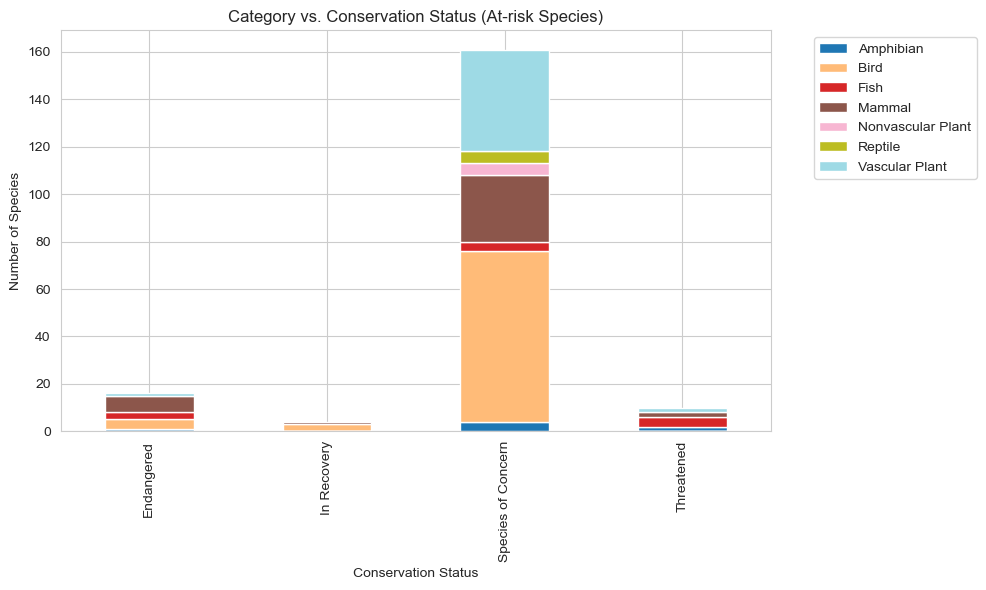

<Figure size 640x480 with 0 Axes>

In [27]:
conservation_categories.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab20'
)
plt.title('Category vs. Conservation Status (At-risk Species)')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

##### Are Some Species More Likely to be At-Risk?
To better understand the relationship between species and their likelihood of being **"at-risk"**, we first need to separate the dataset between species that are not in an endangered situation ("No Intervention Status") and the ones at risk (we will name them "protected").

In [30]:
# Creating a new column to defined what species are protected and what species are free of risk:
spinfo['protected'] = spinfo.conservation_status != "No Intervention"

In [32]:
# Building a pivot table to easier analyze the "protected" Species:
cat_counts = spinfo.groupby(['category', 'protected']).scientific_name.nunique().reset_index().pivot(
    columns='protected',
    index='category',
    values='scientific_name'
).reset_index()

cat_counts.columns = ['category', 'not_protected', 'protected']
cat_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Here we can get a rough idea of what is the distribution of protected vs. not protected species in the dataset, but to better understand how significant the numbers are for each category we need to calculate the percentage of protection per category.

In [35]:
# Calculating the percentage of protection:
cat_counts['protected_percentage'] = cat_counts.protected / (cat_counts.protected + cat_counts.not_protected) * 100
cat_counts

,category,not_protected,protected,protected_percentage
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Using the percentage of protection per category, we can see that **Mammals** and **Birds** are the most affected categories in the whole data set, with **15%** and **17%** of their species having an "at-risk" status, respectively.

##### Comparing Differences In Conservation Status Statistically:

In [39]:
from scipy.stats import chi2_contingency

# Creating a contingency table focusing on "Endangered" vs. "Not Endangered" species:
contingency_table = pd.crosstab(spinfo['category'], spinfo['protected'])

# Performing Chi-Squared Test:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Squared test for Category vs. At-Risk Status")
print(f"Chi^2: {chi2: .4f}, p-value: {p: .4e}, dof: {dof}")

Chi-Squared test for Category vs. At-Risk Status
Chi^2:  469.5114, p-value:  3.0959e-98, dof: 6


The Chi-Squared test for *Category vs. Endangered* status produced a **p-value** near zero, indicating that there is a statistically significant relationship between a species' category and whether it is <span style=color:red>At-Risk</span>.

This means that being endangered is not randomly distributed across categories; some taxonomic groups are more prone to having endangered species than others.

To better understand the statistical relation between the categories and their **"at-risk"** status, lets now use the **Chi-Squared test** to identify if there is any significant statiticall relationship between sepcific categories.

In [43]:
# Testing for statistical relation between "Mammals" and "Reptiles":
contingency_mr = [[30, 146],[5,73]]

# Performing Chi-Squared Test:
chi2, p, dof, expected = chi2_contingency(contingency_mr)
print("Chi-Squared test for Mammal vs Reptile Categories")
print(f"Chi^2: {chi2: .4f}, p-value: {p: .4f}, dof: {dof}")

#Testing for statistical relation between "Mammals" and "Birds":
contingency_mb = [[30, 146], [75, 413]]

# Performing Chi-Squared Test:
chi2, p, dof, expected = chi2_contingency(contingency_mb)
print("Chi-Squared test for Mammal vs Bird Categories")
print(f"Chi^2: {chi2: .4f}, p-value: {p: .4f}, dof: {dof}")

#Testing for statistical relation between "Mammals" and "Fish":
contingency_mf = [[30, 146], [11, 115]]

# Performing Chi-Squared Test:
chi2, p, dof, expected = chi2_contingency(contingency_mf)
print("Chi-Squared test for Mammal vs Fish Categories")
print(f"Chi^2: {chi2: .4f}, p-value: {p: .4f}, dof: {dof}")

Chi-Squared test for Mammal vs Reptile Categories
Chi^2:  4.2892, p-value:  0.0384, dof: 1
Chi-Squared test for Mammal vs Bird Categories
Chi^2:  0.1617, p-value:  0.6876, dof: 1
Chi-Squared test for Mammal vs Fish Categories
Chi^2:  3.6477, p-value:  0.0561, dof: 1


Given that the standard for statistical significance in the Chi-Squared Test is **0.05**, we can see that there is no significant statistical relationship between "Mammal" and "Bird" categories, nor with the "Fish" category. On the other hand, we see that there is a significant relationship between "Mammal" and "Reptile" categories.

##### Which Species Were Spotted The Most At Each Park?

In [47]:
# Merging both datasets to better perform the analysis: 
merged_df = pd.merge(spinfo, observations, on='scientific_name', how='inner')
display(merged_df)


,category,scientific_name,common_names,conservation_status,protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,Yosemite National Park,128
...,...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Intervention,False,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Intervention,False,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",No Intervention,False,Bryce National Park,111


In [49]:
# Summarize total observations of each species per park:
park_species_count = merged_df.groupby(['park_name', 'scientific_name'])['observations'].sum()

# Within each park sort the top species:
top_species_per_park = park_species_count.groupby(level=0, group_keys=False).nlargest(3).reset_index(name='total_observations')
display(top_species_per_park)

,park_name,scientific_name,total_observations
0,Bryce National Park,Columba livia,1017
1,Bryce National Park,Puma concolor,933
2,Bryce National Park,Streptopelia decaocto,903
3,Great Smoky Mountains National Park,Streptopelia decaocto,768
4,Great Smoky Mountains National Park,Procyon lotor,741
5,Great Smoky Mountains National Park,Castor canadensis,729
6,Yellowstone National Park,Holcus lanatus,2415
7,Yellowstone National Park,Streptopelia decaocto,2313
8,Yellowstone National Park,Puma concolor,2259
9,Yosemite National Park,Hypochaeris radicata,1515


Certain species are particularly visible or abundant in each park. It could be due to factors like habitat preference, local biodiversity, or invasive vs. native species dynamics.

To further understand the number of species per park, let us analyze which species per category are present in each of them. For this, we will use the species' common name to identify and separate them by sub-category. For this analysis, we'll focus only on the **"Mammal"** category.

In [53]:
# Cleaning up the Mammal common names for easier sorting: 
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        return text

common_names = spinfo[spinfo.category == "Mammal"].common_names.apply(remove_punctuation).str.split().tolist()
common_names[:10]

[["Gapper's", 'Red-Backed', 'Vole'],
 ['American', 'Bison,', 'Bison'],
 ['Aurochs,',
  'Aurochs,',
  'Domestic',
  'Cattle',
  '(Feral),',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep,', 'Sheep', '(Feral)'],
 ['Wapiti', 'Or', 'Elk'],
 ['White-Tailed', 'Deer'],
 ['Feral', 'Hog,', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

In [55]:
# Removing duplicated names inside rows to avoid errors when couting instances:
clean_rows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)

clean_rows[:10]

[["Gapper's", 'Red-Backed', 'Vole'],
 ['American', 'Bison,', 'Bison'],
 ['Aurochs,', 'Domestic', 'Cattle', '(Feral),', 'Domesticated'],
 ['Domestic', 'Sheep,', 'Mouflon,', 'Red', 'Sheep', '(Feral)'],
 ['Wapiti', 'Or', 'Elk'],
 ['White-Tailed', 'Deer'],
 ['Feral', 'Hog,', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

In [57]:
# Adding all the words into a single list for easier use:
sin_list = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_rows))
sin_list[:10]

["Gapper's",
 'Red-Backed',
 'Vole',
 'American',
 'Bison,',
 'Bison',
 'Aurochs,',
 'Domestic',
 'Cattle',
 '(Feral),']

In [59]:
# Counting the number of occurrences for each word in the list: 
count_words = []
for i in sin_list:
    x = sin_list.count(i)
    count_words.append((i, x))

pd.DataFrame(set(count_words), columns=['Words', 'Count']).sort_values('Count', ascending=False).head()

,Words,Count
141,Shrew,18
8,Myotis,17
48,Bat,17
154,Mouse,15
227,"Bat,",13


From this analysis we can see that the highest number of counts was for **"Shrew"** closesly followed by **"Bat"** and "Myotis" inside the "Mammal" category.

#### Observations Per Park:
To continue with our analysis, lets now incorporate the **"observations"** dataset to better undestand the distribution of species between park.

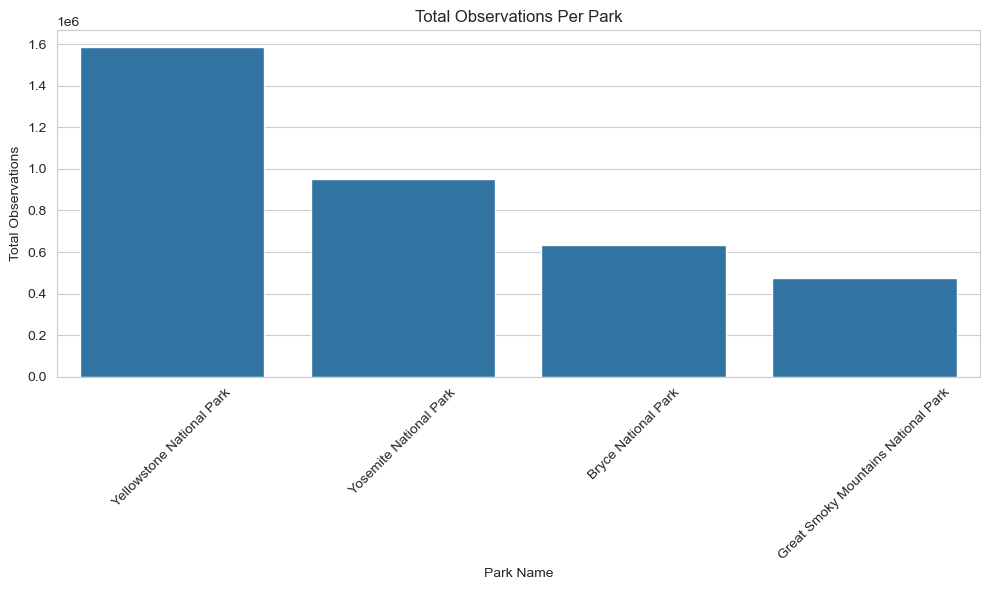

<Figure size 640x480 with 0 Axes>

In [63]:
# Calculating Total Observations Per Park:
observations_per_park = merged_df.groupby('park_name')['observations'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=observations_per_park.index, y=observations_per_park.values)
plt.title('Total Observations Per Park')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

**Yellowstone National Park** has the highest total number of recorded sightings, followed by Yosemite, Bryce, and Great Smoky Mountains. The observation volume can reflect real differences in wildlife activity or simply differences in reporting frequency, visitor count, or park size. Yellowstone appears to have been the most “observed” park in this 7-day data.

In order to have a deeper perspective on the observations by species, lets use the **"Shrew"**  occurances obtained from previous analyses. This will show case how on species ditribute between parks on an individual level.

For this analysis we will create a new column that indicates if a species is a "Shrew" or not, this columns' name will be "is_shrew".

In [68]:
# Creating "is_shrew" column:
spinfo['is_shrew'] = spinfo.common_names.str.contains(r"\bShrew\b", regex=True)
spinfo.head()

,category,scientific_name,common_names,conservation_status,protected,is_shrew
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [70]:
# Filtering for ocurrences where "is_shrew" is True:
spinfo[spinfo.is_shrew]

,category,scientific_name,common_names,conservation_status,protected,is_shrew
79,Mammal,Blarina brevicauda,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
80,Mammal,Cryptotis parva,Least Shrew,No Intervention,False,True
81,Mammal,Sorex cinereus,"Common Shrew, Masked Shrew",No Intervention,False,True
82,Mammal,Sorex dispar,"Long-Tailed Or Rock Shrew, Long-Tailed Shrew",No Intervention,False,True
83,Mammal,Sorex fumeus,Smoky Shrew,No Intervention,False,True
84,Mammal,Sorex hoyi,Pygmy Shrew,No Intervention,False,True
85,Mammal,Sorex longirostris,Southeastern Shrew,No Intervention,False,True
86,Mammal,Sorex palustris,Water Shrew,No Intervention,False,True
3071,Mammal,Sorex cinereus,"Cinereus Shrew, Common Shrew, Masked Shrew",No Intervention,False,True
3072,Mammal,Sorex hoyi,"American Pygmy Shrew, Pygmy Shrew",No Intervention,False,True


Now we will merge the shrew instances with the observations data set to further analyze its occurances in the four parks.

In [73]:
shrew_obs = observations.merge(spinfo[spinfo.is_shrew])
shrew_obs

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,is_shrew
0,Blarina brevicauda,Bryce National Park,77,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
1,Sorex monticolus,Yellowstone National Park,252,Mammal,Dusky Shrew,No Intervention,False,True
2,Sorex monticolus,Yellowstone National Park,252,Mammal,Montane Shrew,No Intervention,False,True
3,Sorex dispar,Bryce National Park,123,Mammal,"Long-Tailed Or Rock Shrew, Long-Tailed Shrew",No Intervention,False,True
4,Blarina brevicauda,Great Smoky Mountains National Park,86,Mammal,"Northern Short Tailed Shrew, Northern Short-Ta...",No Intervention,False,True
...,...,...,...,...,...,...,...,...
99,Sorex cinereus,Great Smoky Mountains National Park,85,Mammal,"Common Shrew, Masked Shrew",No Intervention,False,True
100,Sorex cinereus,Great Smoky Mountains National Park,85,Mammal,"Cinereus Shrew, Common Shrew, Masked Shrew",No Intervention,False,True
101,Sorex longirostris,Great Smoky Mountains National Park,42,Mammal,Southeastern Shrew,No Intervention,False,True
102,Sorex trowbridgii,Great Smoky Mountains National Park,73,Mammal,Trowbridge's Shrew,No Intervention,False,True


Now let us compare how many shrew observations are per park, and how many of these observations are from "protected" and "not protected" species on a park level. 

In [76]:
# Total shrew observation by park:
shrew_obs.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,2655
1,Great Smoky Mountains National Park,1808
2,Yellowstone National Park,6739
3,Yosemite National Park,3814


In [78]:
# Shrew observations by park, splited by "protected" and "not protected" species:
park_obs = shrew_obs.groupby(['park_name', 'protected']).observations.sum().reset_index()
park_obs

,park_name,protected,observations
0,Bryce National Park,False,2584
1,Bryce National Park,True,71
2,Great Smoky Mountains National Park,False,1749
3,Great Smoky Mountains National Park,True,59
4,Yellowstone National Park,False,6546
5,Yellowstone National Park,True,193
6,Yosemite National Park,False,3674
7,Yosemite National Park,True,140


Finally lets create a plot to better show the difference between "protected" and "not protected" shrew species by park.

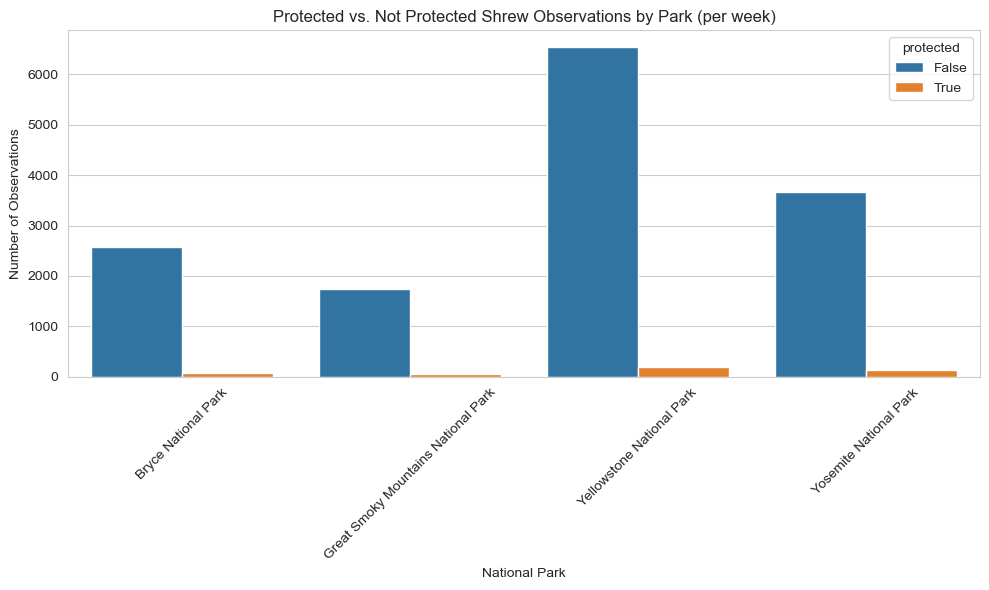

<Figure size 640x480 with 0 Axes>

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x=park_obs.park_name, y=park_obs.observations, hue=park_obs.protected)
plt.title("Protected vs. Not Protected Shrew Observations by Park (per week)")
plt.xlabel("National Park")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.clf()

##### Proportion of Observations by Conservation Status (Per Park)

In [84]:
# Total observations per park calculations: 
total_obs_park = merged_df.groupby('park_name')['observations'].sum().reset_index()
total_obs_park.columns = ['park_name', 'total_observations']

# Calculating observations per park by conservation status:
status_obs_park = merged_df.groupby(['park_name', 'conservation_status'])['observations'].sum().reset_index()

# Merging the total observations to compute the proportions:
prop_park_status = pd.merge(status_obs_park, total_obs_park, on='park_name')
prop_park_status['proportion'] = prop_park_status['observations']/prop_park_status['total_observations']
mask = prop_park_status['conservation_status'] == 'No Intervention'
prop_park_status = prop_park_status[~mask]

print("== Proportion of Observations by Conservation Status (per Park) ==")
print(prop_park_status)

== Proportion of Observations by Conservation Status (per Park) ==
                              park_name conservation_status  observations  \
0                   Bryce National Park          Endangered           619   
1                   Bryce National Park         In Recovery           388   
3                   Bryce National Park  Species of Concern         17011   
4                   Bryce National Park          Threatened           591   
5   Great Smoky Mountains National Park          Endangered           393   
6   Great Smoky Mountains National Park         In Recovery           248   
8   Great Smoky Mountains National Park  Species of Concern         11735   
9   Great Smoky Mountains National Park          Threatened           440   
10            Yellowstone National Park          Endangered          1558   
11            Yellowstone National Park         In Recovery           889   
13            Yellowstone National Park  Species of Concern         40677   
14       

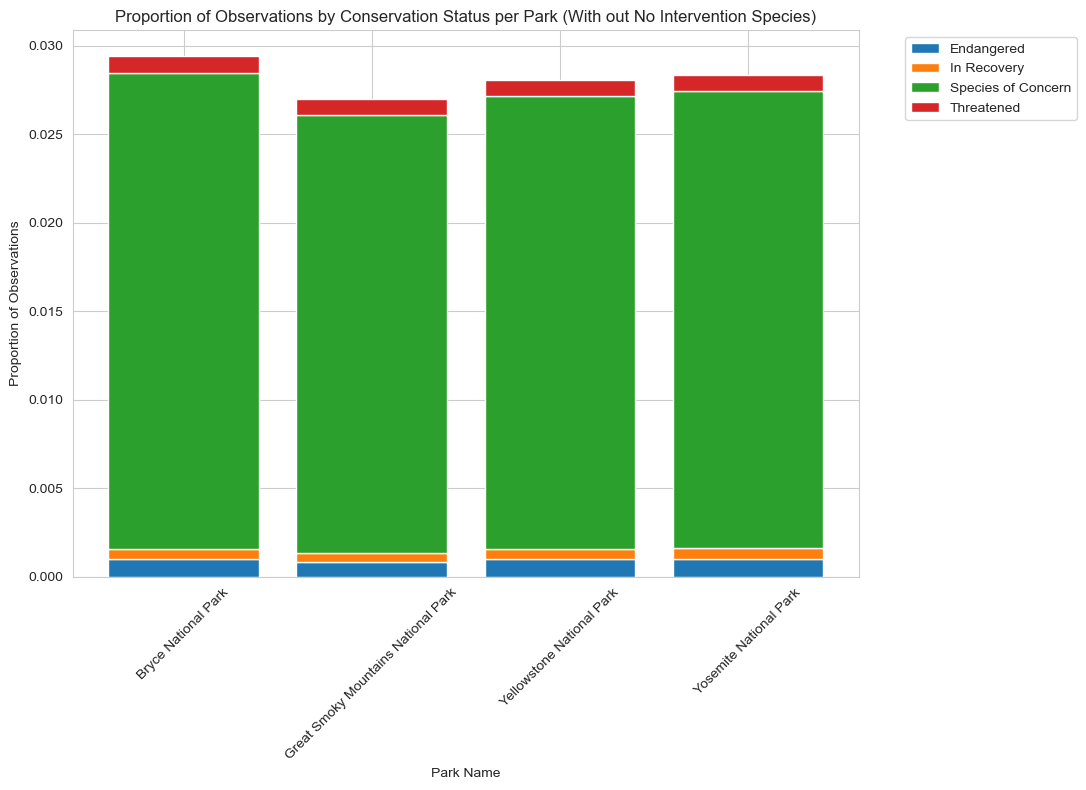

<Figure size 640x480 with 0 Axes>

In [86]:
# Pivot Table Creation: 
pivot_prop = prop_park_status.pivot(index='park_name', columns='conservation_status', values='proportion').fillna(0)

# Stacked bar plot: 
plt.figure(figsize=(11,8))
bottom = np.zeros(len(pivot_prop))
x_labels = pivot_prop.index

for status in pivot_prop.columns:
    plt.bar(x_labels, pivot_prop[status], bottom=bottom)
    bottom += pivot_prop[status]

plt.title('Proportion of Observations by Conservation Status per Park (With out No Intervention Species)')
plt.xlabel('Park Name')
plt.ylabel('Proportion of Observations')
plt.xticks(rotation=45)
plt.legend(pivot_prop.columns, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

##### Species Overlap Between Parks
The goal here is to determine which species (especially endangered ones) are shared among multiple parks.

In [104]:
# Creating a dictionary of multiple sets to sort species by park:
park_to_species = {}
for park in merged_df['park_name'].unique():
    df_park = merged_df[merged_df['park_name'] == park]
    park_to_species[park] = set(df_park['scientific_name'].unique())

# Compare Overlaps:
parks = list(park_to_species.keys())

# Intersection of all parks:
all_parks_intersection = set.intersection(*park_to_species.values())
# print("== Species Observed in All Parks ==")
# print(all_parks_intersection)

# Intersections of any two parks:
for i in range(len(parks)):
    for j in range(i+1, len(parks)):
        common_species = park_to_species[parks[i]].intersection(park_to_species[parks[j]])
        print(f"Common species in {parks[i]} & {parks[j]}: {len(common_species)}")

# Filter for "Endangered" species overlap:
endangered_scientific_names = spinfo[spinfo['conservation_status'] == 'Endangered']['scientific_name'].unique()
endangered_parks = {park: park_to_species[park].intersection(endangered_scientific_names) for park in parks}

print("\n== Endagered species observed in each park ==")
for park, species_set in endangered_parks.items():
    print(f"{park}: {species_set}")

Common species in Bryce National Park & Yellowstone National Park: 179
Common species in Bryce National Park & Great Smoky Mountains National Park: 179
Common species in Bryce National Park & Yosemite National Park: 179
Common species in Yellowstone National Park & Great Smoky Mountains National Park: 179
Common species in Yellowstone National Park & Yosemite National Park: 179
Common species in Great Smoky Mountains National Park & Yosemite National Park: 179

== Endagered species observed in each park ==
Bryce National Park: {'Gymnogyps californianus', 'Etheostoma percnurum', 'Canis lupus', 'Noturus baileyi', 'Rana sierrae', 'Grus americana', 'Canis rufus', 'Vermivora bachmanii', 'Myotis sodalis', 'Geum radiatum', 'Chasmistes liorus', 'Ovis canadensis sierrae', 'Myotis grisescens', 'Glaucomys sabrinus coloratus', 'Picoides borealis'}
Yellowstone National Park: {'Gymnogyps californianus', 'Etheostoma percnurum', 'Canis lupus', 'Noturus baileyi', 'Rana sierrae', 'Grus americana', 'Cani

##### Comparing Observations of Endangered vs. Non-Endangered Species:
The goal with this analysis is to assess whether endangered species have significantly different (lower is expected) observations than non-endangered species. To test if the distribution of sightings significantly differs between Endangered and Non-endangered species, we will be using **Mann-Whitney U test**.

In [92]:
from scipy.stats import mannwhitneyu

merged_df['is_endangered'] = merged_df['conservation_status'] == 'Endangered'

# Sum of observations per species: 
species_observations = merged_df.groupby(['scientific_name', 'is_endangered'])['observations'].sum().reset_index()

# Separating the data by Endangered and Non-endangered: 
endangered_obs = species_observations[species_observations['is_endangered']]['observations']
non_endangered_obs = species_observations[~species_observations['is_endangered']]['observations']

print("Average observations (Endangered):", endangered_obs.mean())
print("Average observations (Non-endangered):", non_endangered_obs.mean())

# Comparing distribution differences using Mann-Whitney U test:
stat, p_value = mannwhitneyu(endangered_obs, non_endangered_obs, alternative='two-sided')
print(f"Mann-Whitney U Test: stat={stat}, p_value={p_value}")

Average observations (Endangered): 234.2
Average observations (Non-endangered): 658.8988601411254
Mann-Whitney U Test: stat=5254.0, p_value=4.928860142337948e-09


##### Sub-Category Anlysis:
In this analysis we will be comparing the distribution of values for both, category and conservations status, within each animal/plant category.

== Observations by Category and Conservation Status ==
conservation_status  Endangered  In Recovery  Species of Concern  Threatened
category                                                                    
Amphibian                   144            0                2044         564
Bird                        574         1392               40758           0
Fish                        455            0                2109        1645
Mammal                     2178          715               21675         578
Nonvascular Plant             0            0                2705           0
Reptile                       0            0                2536           0
Vascular Plant              162            0               22135         552


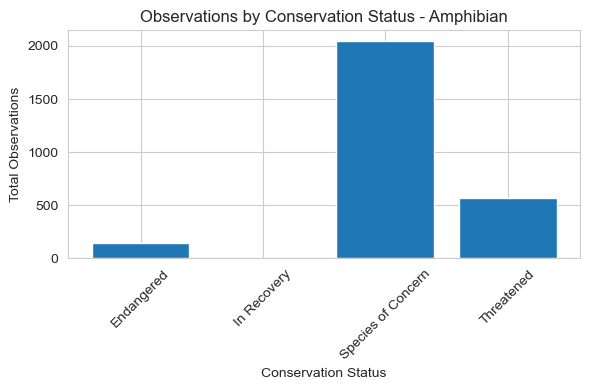

<Figure size 640x480 with 0 Axes>

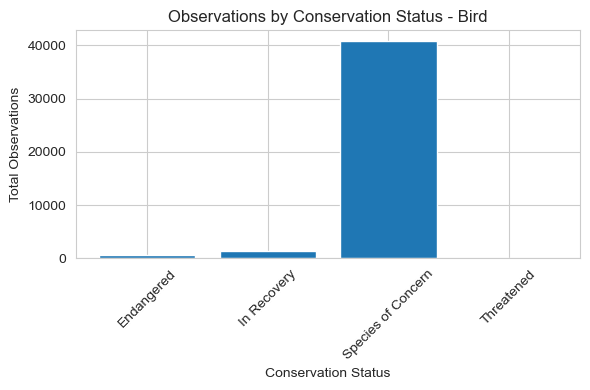

<Figure size 640x480 with 0 Axes>

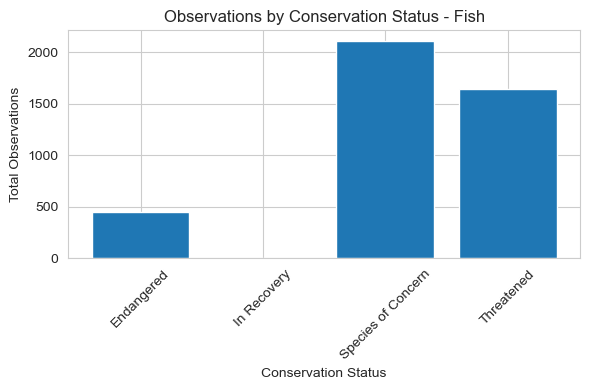

<Figure size 640x480 with 0 Axes>

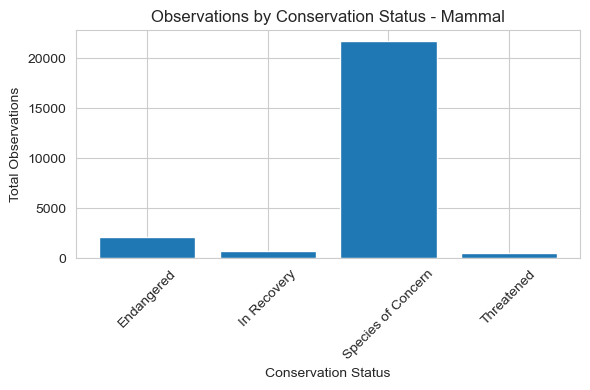

<Figure size 640x480 with 0 Axes>

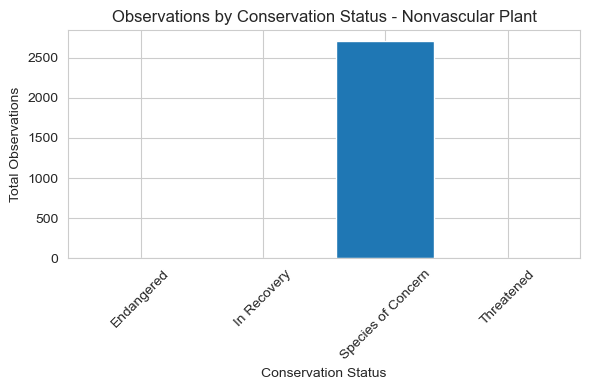

<Figure size 640x480 with 0 Axes>

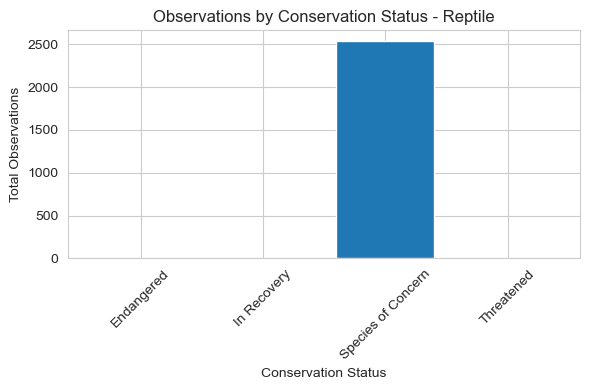

<Figure size 640x480 with 0 Axes>

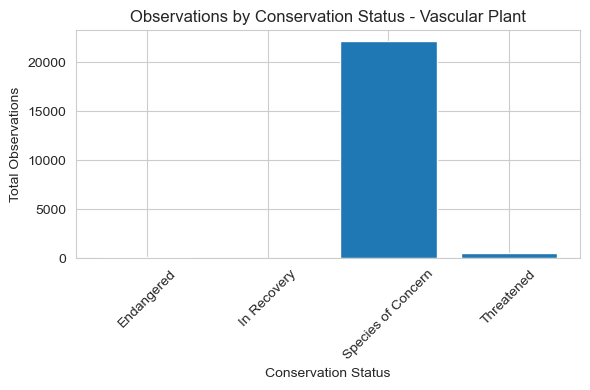

<Figure size 640x480 with 0 Axes>

In [95]:
# Creating a pivot table of category vs. conservation status:
merged_df = merged_df[(merged_df['conservation_status'] != "No Intervention")]

pivot_category = pd.pivot_table(
    merged_df,
    index='category',
    columns='conservation_status',
    values='observations',
    aggfunc='sum',
    fill_value=0
)
print("== Observations by Category and Conservation Status ==")
print(pivot_category)

# Plotting a chart for category breakdown: 
for cat in pivot_category.index:
    row = pivot_category.loc[cat]
    statuses = row.index
    counts = row.values
    plt.figure(figsize=(6,4))
    plt.bar(statuses, counts)
    plt.title(f"Observations by Conservation Status - {cat}")
    plt.xlabel("Conservation Status")
    plt.ylabel("Total Observations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.clf()

From this analysis we can identify that, after removing the all species that aren't "at-risk", conservation status with more occurances is the **"Species of Concern"**. Which make sense, given that this status represents species that have a lower risk of endangerment compare to others. 

##### Ratio of Endangered Species Observed vs. Total Endangered Species:
The goal with this analysis is to identify the parks with a **higher percentage** of endangered species from the whole data set. This information might be especially critical for conservations efforts at the park level. 

In [99]:
# Getting all endangered species into one dataset:
all_endangered_species = set(spinfo[spinfo['conservation_status'] != 'No Intervention']['scientific_name'].unique())
total_endangered_count = len(all_endangered_species)

# Obtaining the number of observed endangered species per park:
park_endangered_df = merged_df[merged_df['conservation_status'] != 'No Intervention']
park_endangered_unique = park_endangered_df.groupby('park_name')['scientific_name'].nunique().reset_index()
park_endangered_unique.columns = ['park_name', 'observed_endangered_species']

# Calculating the proportions:
park_endangered_unique['pct_of_all_endangered'] =(
    park_endangered_unique['observed_endangered_species']/total_endangered_count
) * 100

print("== Endangered Species Presence by Park ==")
print(park_endangered_unique)

== Endangered Species Presence by Park ==
                             park_name  observed_endangered_species  \
0                  Bryce National Park                          179   
1  Great Smoky Mountains National Park                          179   
2            Yellowstone National Park                          179   
3               Yosemite National Park                          179   

   pct_of_all_endangered  
0                  100.0  
1                  100.0  
2                  100.0  
3                  100.0  


Here we see that even if the number of observations changes between all species across all parks, the number of observed <span style=color:red>"at-risk"</span> species **is the same in all parks**.

#### Conclusion: 
A majority of species in the dataset were classified under No Intervention, indicating they are not officially listed as endangered or threatened. Nevertheless, across all parks, Species of Concern and Endangered categories make up a noticeable minority, reflecting that conservation action is still warranted for these at-risk groups. *Vascular Plants* dominate the dataset in terms of both species count and observation volumes, while animals (Mammals, Birds, Fish, Amphibians, Reptiles) showed smaller but significant at-risk populations.

Parks exhibit similar **proportional trends** of at-risk species sightings when focusing solely on species with official conservation statuses (i.e., excluding “No Intervention”). Most of the observations among at-risk groups fall under the “Species of Concern,” with fewer Endangered, Threatened, or In Recovery sightings. **Yellowstone** and **Yosemite** generally have the highest total observation counts. This may correlate with higher visitations, larger park sizes, or diverse habitats.

In every category—from Amphibians to Vascular Plants—the bulk of observations are from species not in a special status. However, **Mammals and Birds** do show sizable “Species of Concern” observations, and a small share of Endangered or Threatened sightings. **Mammals** in particular have a higher proportion of Endangered/Threatened sightings relative to other categories, consistent with earlier chi-square tests showing some categories are more susceptible to endangerment.

#### Further Analysis:
- **Longer-Term Monitoring:** Expand the observation window beyond 7 days. Time-series data (across seasons or years) will offer a clearer understanding of species population trends and park-specific dynamics.
- **Invasive vs. Native Species:** Classify species as native or invasive. Invasive species could outcompete the affected natives, controlling them may help conservation efforts.